In [1]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import sys
import torch.optim as optim
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [2]:
torch.manual_seed(60)

##导入数据
data = pd.read_csv('E:\实验数据\python\RNN_data\data_24.csv')
data = data.values

##转换成array
data_array = data.astype('double')

n_train = 1000
train_x = data_array[:n_train,:-1]
train_y = data_array[:n_train,[-1]]
test_x = data_array[n_train:, :-1]
test_y = data_array[n_train:, [-1]]

In [3]:
train_y.shape

(1000, 1)

In [4]:
##归一化
x_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
y_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

# train_X = x_scaler.fit_transform(train_x)
train_X = y_scaler.fit_transform(train_x)
train_Y = y_scaler.fit_transform(train_y)
test_X = y_scaler.fit_transform(test_x)
test_Y = y_scaler.fit_transform(test_y)

In [5]:
seq_len = 50
TIME_STEP = 1200
INPUT_SIZE = 4
HIDDEN_SIZE = 64
LR = 0.01

In [6]:
#转换成tensor
train_X = torch.tensor(train_X, dtype=torch.float32)
train_Y = torch.tensor(train_Y, dtype=torch.float32)
test_X = torch.tensor(test_X, dtype=torch.float32)
test_Y = torch.tensor(test_Y, dtype=torch.float32) 

# 分成batch
#x (batch, time_step, input_size)
train_X = train_X.reshape(seq_len, -1, INPUT_SIZE) 
train_Y = train_Y.reshape(seq_len, -1, 1) 
test_X = test_X.reshape(seq_len, -1, INPUT_SIZE) 
test_Y = test_Y.reshape(seq_len, -1, 1) 

In [7]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=HIDDEN_SIZE,  # RNN隐藏神经元个数
            num_layers=1,  # RNN隐藏层个数
        )
        self.out = nn.Linear(HIDDEN_SIZE, 1)

    def forward(self, x, h):
        # x (time_step, batch_size, input_size)
        # h (n_layers, batch, hidden_size)
        # out (time_step, batch_size, hidden_size)
        out, h = self.rnn(x, h)
        prediction = self.out(out)
        return prediction, h

In [8]:
rnn = RNN()
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.MSELoss()
h_state = None

 迭代次数: 1
train loss: 0.19006243348121643
 迭代次数: 2
train loss: 0.5240519642829895
 迭代次数: 3
train loss: 0.14340706169605255
 迭代次数: 4
train loss: 0.15340732038021088
 迭代次数: 5
train loss: 0.15627089142799377
 迭代次数: 6
train loss: 0.14260779321193695
 迭代次数: 7
train loss: 0.1254395693540573
 迭代次数: 8
train loss: 0.11715447902679443
 迭代次数: 9
train loss: 0.1184316948056221
 迭代次数: 10
train loss: 0.11204718053340912
 迭代次数: 11
train loss: 0.09966729581356049
 迭代次数: 12
train loss: 0.10074398666620255
 迭代次数: 13
train loss: 0.10654599219560623
 迭代次数: 14
train loss: 0.10106964409351349
 迭代次数: 15
train loss: 0.10354434698820114
 迭代次数: 16
train loss: 0.09498190879821777
 迭代次数: 17
train loss: 0.0913299024105072
 迭代次数: 18
train loss: 0.08657222986221313
 迭代次数: 19
train loss: 0.08644938468933105
 迭代次数: 20
train loss: 0.08065331727266312
 迭代次数: 21
train loss: 0.09058865159749985
 迭代次数: 22
train loss: 0.08821284770965576
 迭代次数: 23
train loss: 0.08718342334032059
 迭代次数: 24
train loss: 0.10204441845417023
 迭代次数

 迭代次数: 216
train loss: 0.05074307695031166
 迭代次数: 217
train loss: 0.04666031524538994
 迭代次数: 218
train loss: 0.04627782851457596
 迭代次数: 219
train loss: 0.040433891117572784
 迭代次数: 220
train loss: 0.044812507927417755
 迭代次数: 221
train loss: 0.04334552213549614
 迭代次数: 222
train loss: 0.036331672221422195
 迭代次数: 223
train loss: 0.03931271657347679
 迭代次数: 224
train loss: 0.04123230278491974
 迭代次数: 225
train loss: 0.038690220564603806
 迭代次数: 226
train loss: 0.03718361631035805
 迭代次数: 227
train loss: 0.03517831116914749
 迭代次数: 228
train loss: 0.03392985463142395
 迭代次数: 229
train loss: 0.03534959256649017
 迭代次数: 230
train loss: 0.03442118689417839
 迭代次数: 231
train loss: 0.032907214015722275
 迭代次数: 232
train loss: 0.03294713422656059
 迭代次数: 233
train loss: 0.03316253796219826
 迭代次数: 234
train loss: 0.03146730363368988
 迭代次数: 235
train loss: 0.032204002141952515
 迭代次数: 236
train loss: 0.031186271458864212
 迭代次数: 237
train loss: 0.03165896236896515
 迭代次数: 238
train loss: 0.031045209616422653
 迭代

train loss: 0.009568072855472565
 迭代次数: 436
train loss: 0.009407366625964642
 迭代次数: 437
train loss: 0.009373592212796211
 迭代次数: 438
train loss: 0.008772717788815498
 迭代次数: 439
train loss: 0.009069491177797318
 迭代次数: 440
train loss: 0.009055204689502716
 迭代次数: 441
train loss: 0.00896332785487175
 迭代次数: 442
train loss: 0.00921852607280016
 迭代次数: 443
train loss: 0.00899280235171318
 迭代次数: 444
train loss: 0.008975387550890446
 迭代次数: 445
train loss: 0.00881204567849636
 迭代次数: 446
train loss: 0.008704859763383865
 迭代次数: 447
train loss: 0.009112418629229069
 迭代次数: 448
train loss: 0.008611954748630524
 迭代次数: 449
train loss: 0.00889318436384201
 迭代次数: 450
train loss: 0.008694394491612911
 迭代次数: 451
train loss: 0.008553559891879559
 迭代次数: 452
train loss: 0.00859017577022314
 迭代次数: 453
train loss: 0.008502407930791378
 迭代次数: 454
train loss: 0.00856217835098505
 迭代次数: 455
train loss: 0.00834205187857151
 迭代次数: 456
train loss: 0.00841715931892395
 迭代次数: 457
train loss: 0.00847083143889904
 迭代次数: 45

 迭代次数: 648
train loss: 0.006561345886439085
 迭代次数: 649
train loss: 0.006554183084517717
 迭代次数: 650
train loss: 0.006564056500792503
 迭代次数: 651
train loss: 0.00656012911349535
 迭代次数: 652
train loss: 0.006519329734146595
 迭代次数: 653
train loss: 0.006560818292200565
 迭代次数: 654
train loss: 0.00653761625289917
 迭代次数: 655
train loss: 0.006521659903228283
 迭代次数: 656
train loss: 0.006530079059302807
 迭代次数: 657
train loss: 0.0065313377417624
 迭代次数: 658
train loss: 0.006550566293299198
 迭代次数: 659
train loss: 0.006484336219727993
 迭代次数: 660
train loss: 0.006565575022250414
 迭代次数: 661
train loss: 0.006546939257532358
 迭代次数: 662
train loss: 0.006486113648861647
 迭代次数: 663
train loss: 0.00658362777903676
 迭代次数: 664
train loss: 0.006535451393574476
 迭代次数: 665
train loss: 0.006599118001759052
 迭代次数: 666
train loss: 0.006545847747474909
 迭代次数: 667
train loss: 0.006630722898989916
 迭代次数: 668
train loss: 0.006701238453388214
 迭代次数: 669
train loss: 0.006482425145804882
 迭代次数: 670
train loss: 0.006787394173

train loss: 0.005811750423163176
 迭代次数: 853
train loss: 0.006278327200561762
 迭代次数: 854
train loss: 0.006309487856924534
 迭代次数: 855
train loss: 0.005880527198314667
 迭代次数: 856
train loss: 0.006174642592668533
 迭代次数: 857
train loss: 0.006163733545690775
 迭代次数: 858
train loss: 0.005970463622361422
 迭代次数: 859
train loss: 0.0059295641258358955
 迭代次数: 860
train loss: 0.006243952549993992
 迭代次数: 861
train loss: 0.00598946725949645
 迭代次数: 862
train loss: 0.005823259707540274
 迭代次数: 863
train loss: 0.006237504072487354
 迭代次数: 864
train loss: 0.005928862374275923
 迭代次数: 865
train loss: 0.005841332953423262
 迭代次数: 866
train loss: 0.0060973986983299255
 迭代次数: 867
train loss: 0.005978960078209639
 迭代次数: 868
train loss: 0.005895192734897137
 迭代次数: 869
train loss: 0.0058980374597013
 迭代次数: 870
train loss: 0.006088017951697111
 迭代次数: 871
train loss: 0.005903036333620548
 迭代次数: 872
train loss: 0.005771222524344921
 迭代次数: 873
train loss: 0.006137197371572256
 迭代次数: 874
train loss: 0.005839027464389801


train loss: 0.006420827470719814
 迭代次数: 1062
train loss: 0.006928092800080776
 迭代次数: 1063
train loss: 0.006937942001968622
 迭代次数: 1064
train loss: 0.0061325980350375175
 迭代次数: 1065
train loss: 0.005525228567421436
 迭代次数: 1066
train loss: 0.005738626234233379
 迭代次数: 1067
train loss: 0.0062665194272994995
 迭代次数: 1068
train loss: 0.00668347766622901
 迭代次数: 1069
train loss: 0.006458377931267023
 迭代次数: 1070
train loss: 0.005930961109697819
 迭代次数: 1071
train loss: 0.0055897412821650505
 迭代次数: 1072
train loss: 0.005708965938538313
 迭代次数: 1073
train loss: 0.005758543964475393
 迭代次数: 1074
train loss: 0.006043087225407362
 迭代次数: 1075
train loss: 0.0057563502341508865
 迭代次数: 1076
train loss: 0.005607723258435726
 迭代次数: 1077
train loss: 0.005607044789940119
 迭代次数: 1078
train loss: 0.005959910806268454
 迭代次数: 1079
train loss: 0.005706859286874533
 迭代次数: 1080
train loss: 0.005812040530145168
 迭代次数: 1081
train loss: 0.005844357889145613
 迭代次数: 1082
train loss: 0.00624760240316391
 迭代次数: 1083
train lo

train loss: 0.005671257618814707
 迭代次数: 1272
train loss: 0.005572776775807142
 迭代次数: 1273
train loss: 0.005437807645648718
 迭代次数: 1274
train loss: 0.005774767138063908
 迭代次数: 1275
train loss: 0.0052914125844836235
 迭代次数: 1276
train loss: 0.005785841960459948
 迭代次数: 1277
train loss: 0.005504165776073933
 迭代次数: 1278
train loss: 0.005504169501364231
 迭代次数: 1279
train loss: 0.005752686411142349
 迭代次数: 1280
train loss: 0.005309999454766512
 迭代次数: 1281
train loss: 0.005853930953890085
 迭代次数: 1282
train loss: 0.005387845914810896
 迭代次数: 1283
train loss: 0.005674066487699747
 迭代次数: 1284
train loss: 0.005759862717241049
 迭代次数: 1285
train loss: 0.0053468672558665276
 迭代次数: 1286
train loss: 0.005976181942969561
 迭代次数: 1287
train loss: 0.0053180307149887085
 迭代次数: 1288
train loss: 0.0058144167996943
 迭代次数: 1289
train loss: 0.005637724883854389
 迭代次数: 1290
train loss: 0.0054729171097278595
 迭代次数: 1291
train loss: 0.0060472432523965836
 迭代次数: 1292
train loss: 0.0052841296419501305
 迭代次数: 1293
train 

train loss: 0.0065833148546516895
 迭代次数: 1478
train loss: 0.0063450876623392105
 迭代次数: 1479
train loss: 0.007284779567271471
 迭代次数: 1480
train loss: 0.005916615016758442
 迭代次数: 1481
train loss: 0.006352463737130165
 迭代次数: 1482
train loss: 0.007261797785758972
 迭代次数: 1483
train loss: 0.006636509671807289
 迭代次数: 1484
train loss: 0.0066582742147147655
 迭代次数: 1485
train loss: 0.005958945024758577
 迭代次数: 1486
train loss: 0.007687362842261791
 迭代次数: 1487
train loss: 0.006066309753805399
 迭代次数: 1488
train loss: 0.006624142173677683
 迭代次数: 1489
train loss: 0.0061810202896595
 迭代次数: 1490
train loss: 0.007031201850622892
 迭代次数: 1491
train loss: 0.0063192397356033325
 迭代次数: 1492
train loss: 0.0061437045224010944
 迭代次数: 1493
train loss: 0.006687840446829796
 迭代次数: 1494
train loss: 0.006360502913594246
 迭代次数: 1495
train loss: 0.006561593152582645
 迭代次数: 1496
train loss: 0.005541082005947828
 迭代次数: 1497
train loss: 0.006858461536467075
 迭代次数: 1498
train loss: 0.005825075786560774
 迭代次数: 1499
train l

train loss: 0.006587163079530001
 迭代次数: 1662
train loss: 0.006933352444320917
 迭代次数: 1663
train loss: 0.0069472878240048885
 迭代次数: 1664
train loss: 0.006780564319342375
 迭代次数: 1665
train loss: 0.007026149891316891
 迭代次数: 1666
train loss: 0.005796689074486494
 迭代次数: 1667
train loss: 0.007236257661134005
 迭代次数: 1668
train loss: 0.006038733292371035
 迭代次数: 1669
train loss: 0.006777159869670868
 迭代次数: 1670
train loss: 0.005910829640924931
 迭代次数: 1671
train loss: 0.006541443057358265
 迭代次数: 1672
train loss: 0.005927617661654949
 迭代次数: 1673
train loss: 0.006894966587424278
 迭代次数: 1674
train loss: 0.005829907022416592
 迭代次数: 1675
train loss: 0.0065846070647239685
 迭代次数: 1676
train loss: 0.005635334178805351
 迭代次数: 1677
train loss: 0.006411500740796328
 迭代次数: 1678
train loss: 0.006146649830043316
 迭代次数: 1679
train loss: 0.006441337522119284
 迭代次数: 1680
train loss: 0.005720554850995541
 迭代次数: 1681
train loss: 0.00640308391302824
 迭代次数: 1682
train loss: 0.005921207368373871
 迭代次数: 1683
train los

train loss: 0.00617572758346796
 迭代次数: 1849
train loss: 0.006535081192851067
 迭代次数: 1850
train loss: 0.006510097533464432
 迭代次数: 1851
train loss: 0.006376619450747967
 迭代次数: 1852
train loss: 0.006189863197505474
 迭代次数: 1853
train loss: 0.006089751608669758
 迭代次数: 1854
train loss: 0.005806725472211838
 迭代次数: 1855
train loss: 0.005747197195887566
 迭代次数: 1856
train loss: 0.005602708086371422
 迭代次数: 1857
train loss: 0.005829576402902603
 迭代次数: 1858
train loss: 0.005979688838124275
 迭代次数: 1859
train loss: 0.00576007692143321
 迭代次数: 1860
train loss: 0.0056112040765583515
 迭代次数: 1861
train loss: 0.0057083964347839355
 迭代次数: 1862
train loss: 0.005458986386656761
 迭代次数: 1863
train loss: 0.00546014541760087
 迭代次数: 1864
train loss: 0.005350326653569937
 迭代次数: 1865
train loss: 0.005757724866271019
 迭代次数: 1866
train loss: 0.005320580676198006
 迭代次数: 1867
train loss: 0.005660792347043753
 迭代次数: 1868
train loss: 0.005263570696115494
 迭代次数: 1869
train loss: 0.005414921324700117
 迭代次数: 1870
train loss:

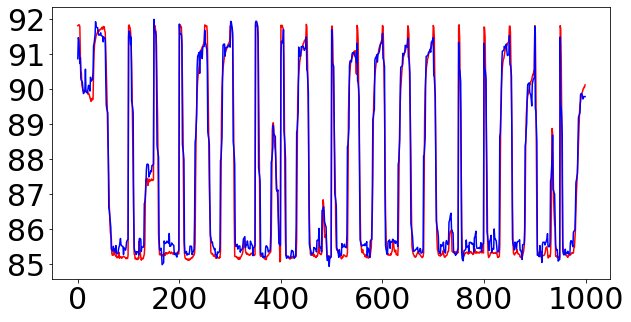

In [9]:
epochs = 2000
i = 0
loss_array = []
for epoch in range(epochs):
    i = i+1
    print(" 迭代次数: {}".format(i))      
    prediction, h_state = rnn(train_X, h_state)
    h_state = h_state.detach()
    loss = loss_func(prediction, train_Y)
    loss_array.append(loss.detach().numpy())
    print("train loss: {}".format(loss))
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step()
    
    #画图
num = list(range(n_train))
# 红色是实际，蓝色是预测
plt.figure(1, figsize=(10, 5))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

prediction =  prediction.data.numpy().reshape(-1, 1)
train_Y = np.array(train_Y).reshape(-1, 1)

show_labels = y_scaler.inverse_transform(train_Y)  #反归一化
y = y_scaler.inverse_transform(prediction)

error = show_labels - y
rmse = np.mean(error ** 2) ** 0.5
print("rmse:", rmse.item())

plt.plot(num, show_labels, 'r-')
plt.plot(num, y, 'b-')
plt.draw();  
     
        

rmse: 3.5787221085517125


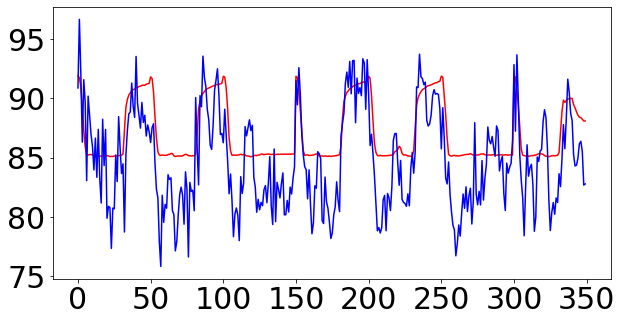

In [10]:
h_state = torch.randn(1, 7, 64)
prediction, h_state = rnn(test_X, h_state)
prediction = prediction.data.numpy().reshape(-1,1)
test_Y = np.array(test_Y).reshape(-1,1)

show_labels = y_scaler.inverse_transform(test_Y)  #反归一化
y = y_scaler.inverse_transform(prediction)


# 画图
num = list(range(350))
# 红色是实际，蓝色是预测
plt.figure(1, figsize=(10, 5))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.plot(num, show_labels, 'r-')   #实际值
plt.plot(num, y, 'b-')             #预测值
plt.draw();  

error = show_labels - y
rmse = np.mean(error ** 2) ** 0.5
print("rmse:", rmse.item())
# print("train_time:", train_time)

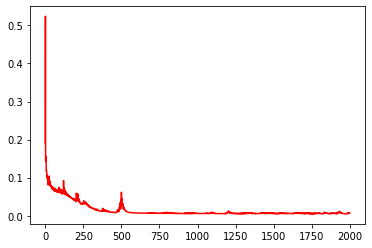

In [11]:
# print(loss_array)
num = list(range(epochs))
plt.plot(num, loss_array, 'r-')